# Quantifying Complexity Across QXDM Log Categories  

> *"How much engineering complexity does each cellular protocol layer contribute to the overall system implementation?"*  

This notebook answers the question by  

1. embedding every log sentence from different QXDM protocol categories with a **sentence-transformer model**,  
2. computing five semantic‑complexity metrics for each log category,  
3. analyzing inter-category relationships through **change magnitude** and **novelty density**,  
4. visualizing complexity patterns using heatmaps and trend plots.  

**Data Source**: QXDM cellular protocol logs (RRC, MAC, PHY layers)

## 1. Data & Pre‑processing  

* **Data Source** – QXDM cellular protocol logs from different layers (RRC, MAC, PHY, etc.)
* **Sentence splitting** – spaCy `sentencizer` component with optimized punctuation handling  
* **Embedding** – `sentence-transformers/all-MiniLM-L6-v2` model for semantic representation
* **Device Support** – CUDA GPU acceleration for faster processing

**Output Files**:  

| file | purpose |
|------|---------|
| `release_metrics.csv` | per‑category absolute metrics & sentence counts |
| `delta_metrics.csv`   | inter‑category relationships (CM, ND) |

**Log Categories Processed**: Each subdirectory in QXDM_ROOT represents a protocol category

## 2. Complexity Metrics for QXDM Protocol Analysis  

| Symbol | Name | Formula | Captures |
|--------|------|---------|----------|
| SS | *Semantic Spread* | $\operatorname{Tr}\!\bigl(\operatorname{Cov}(\mathbf{s})\bigr)$ | Breadth of protocol operations |
| RI | *Redundancy Index* | $1-\bar{\,\cos(\mathbf{s}_i,\mathbf{s}_j)\,}$ | Protocol message diversity |
| CE | *Cluster Entropy* | $H\_k = -\sum\_{c=1}^k p_c\log p_c$ (k‑means, adaptive k) | Protocol state distribution |
| CM | *Change Magnitude* | $1-\cos(\mu_a,\mu_b)$ | Protocol layer semantic distance |
| ND | *Novelty Density* | $\displaystyle\frac1N\sum_i \min_j \|\mathbf{s}_i-\mathbf{s}_j^{(other)}\|$ | Inter‑layer operational uniqueness |  

All vectors $\mathbf{s}$ live in the sentence-transformer 384‑D embedding space.

**Interpretation for Cellular Protocols**:
- **Higher SS**: More diverse protocol operations within a layer
- **Higher RI**: Less repetitive message patterns  
- **Higher CE**: More balanced state machine complexity
- **Higher CM**: Greater semantic distance between protocol layers
- **Higher ND**: More unique operations not found in other layers

## 3. QXDM Protocol Complexity Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load the QXDM analysis results
release_df = pd.read_csv('../release_metrics.csv')
delta_df = pd.read_csv('../delta_metrics.csv')

# Rename 'category' to 'protocol' for clarity in QXDM context
release_df = release_df.rename(columns={'category': 'protocol'})

# Display data overview
print("=== QXDM Protocol Categories ===")
print(f"Number of protocol categories: {len(release_df)}")
print(f"Total sentences analyzed: {release_df['sentences'].sum():,}")
print("\nProtocol categories found:")
for i, row in release_df.iterrows():
    print(f"  {row['protocol']}: {row['sentences']} sentences")

print(f"\n=== Inter-Protocol Relationships ===")
print(f"Number of protocol pairs: {len(delta_df)//2}")  # Divided by 2 since bidirectional

# Show data structure
print(f"\n=== Data Preview ===")
print("Release metrics:")
print(release_df.head())
print(f"\nDelta metrics:")
print(delta_df.head())

=== QXDM Protocol Categories ===
Number of protocol categories: 10
Total sentences analyzed: 121,222

Protocol categories found:
  CableCar: 7768 sentences
  CityRoadTest: 30174 sentences
  HyderPark: 10728 sentences
  Lift: 5929 sentences
  M4Highway: 20044 sentences
  RuralLoop: 19782 sentences
  SckyScarper: 3261 sentences
  StarBuck: 3326 sentences
  TimesRiver: 13951 sentences
  Underground: 6259 sentences

=== Inter-Protocol Relationships ===
Number of protocol pairs: 45

=== Data Preview ===
Release metrics:
       protocol  sentences  semantic_spread  redundancy_index  cluster_entropy
0      CableCar       7768         0.530268          0.530233         4.911463
1  CityRoadTest      30174         0.482679          0.482562         4.368486
2     HyderPark      10728         0.505231          0.506741         4.819949
3          Lift       5929         0.489953          0.488631         4.862789
4     M4Highway      20044         0.524375          0.526913         4.856098

Delt

### 3.1 Semantic Spread (SS) - Protocol Operation Diversity

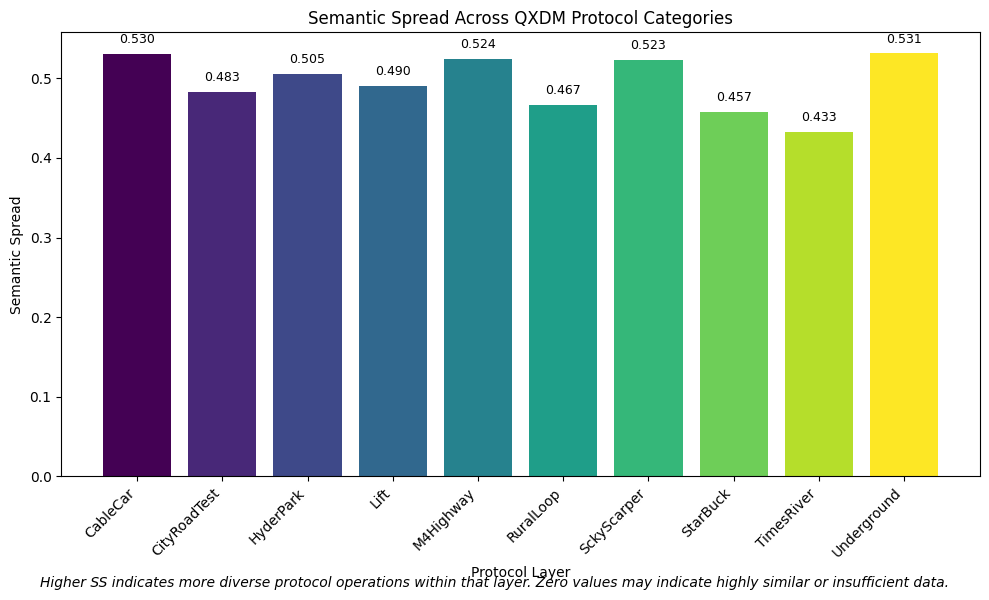

Semantic Spread Statistics:
Mean: 0.494
Std:  0.034
Range: 0.433 - 0.531


In [2]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(release_df['protocol'], release_df['semantic_spread'], 
              color=plt.cm.viridis(np.linspace(0, 1, len(release_df))))
ax.set_xlabel('Protocol Layer')
ax.set_ylabel('Semantic Spread')
ax.set_title('Semantic Spread Across QXDM Protocol Categories')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, release_df['semantic_spread']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontsize=9)

fig.text(
    0.5, 0.02,
    'Higher SS indicates more diverse protocol operations within that layer. Zero values may indicate highly similar or insufficient data.',
    ha='center', va='center', fontsize=10, style='italic'
)
plt.tight_layout()
plt.show()

# Show statistics
print(f"Semantic Spread Statistics:")
print(f"Mean: {release_df['semantic_spread'].mean():.3f}")
print(f"Std:  {release_df['semantic_spread'].std():.3f}")
print(f"Range: {release_df['semantic_spread'].min():.3f} - {release_df['semantic_spread'].max():.3f}")

### 3.2 Redundancy Index (RI) - Message Pattern Diversity

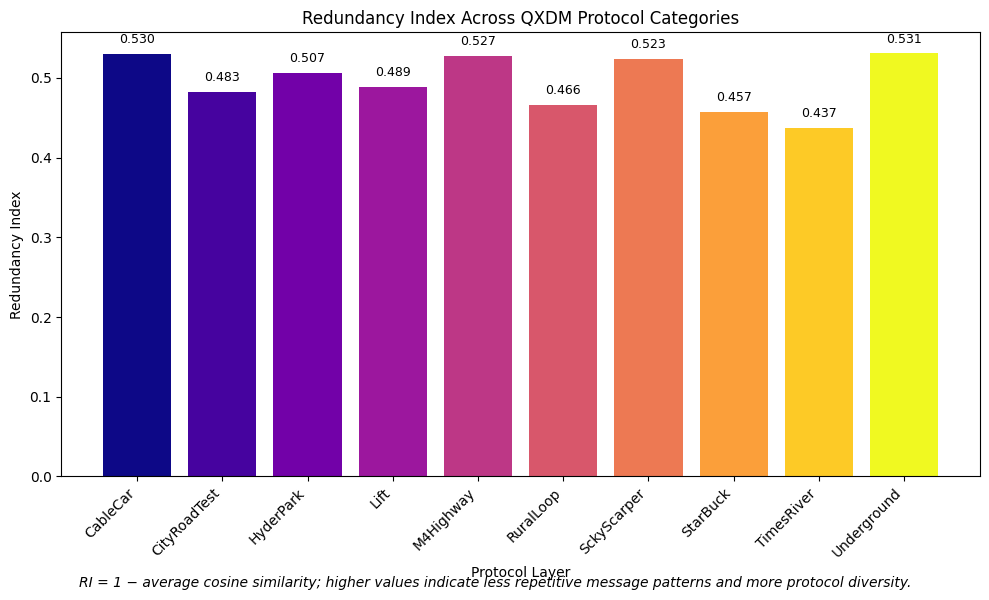

Redundancy Index Statistics:
Mean: 0.495
Std:  0.034
Range: 0.437 - 0.531


In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(release_df['protocol'], release_df['redundancy_index'], 
              color=plt.cm.plasma(np.linspace(0, 1, len(release_df))))
ax.set_xlabel('Protocol Layer')
ax.set_ylabel('Redundancy Index')
ax.set_title('Redundancy Index Across QXDM Protocol Categories')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, release_df['redundancy_index']):
    height = bar.get_height()
    if height > 0:  # Only show labels for non-zero values
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)

fig.text(
    0.5, 0.02,
    'RI = 1 − average cosine similarity; higher values indicate less repetitive message patterns and more protocol diversity.',
    ha='center', va='center', fontsize=10, style='italic'
)
plt.tight_layout()
plt.show()

print(f"Redundancy Index Statistics:")
print(f"Mean: {release_df['redundancy_index'].mean():.3f}")
print(f"Std:  {release_df['redundancy_index'].std():.3f}")
print(f"Range: {release_df['redundancy_index'].min():.3f} - {release_df['redundancy_index'].max():.3f}")

### 3.3 Cluster Entropy (CE) - Protocol State Distribution


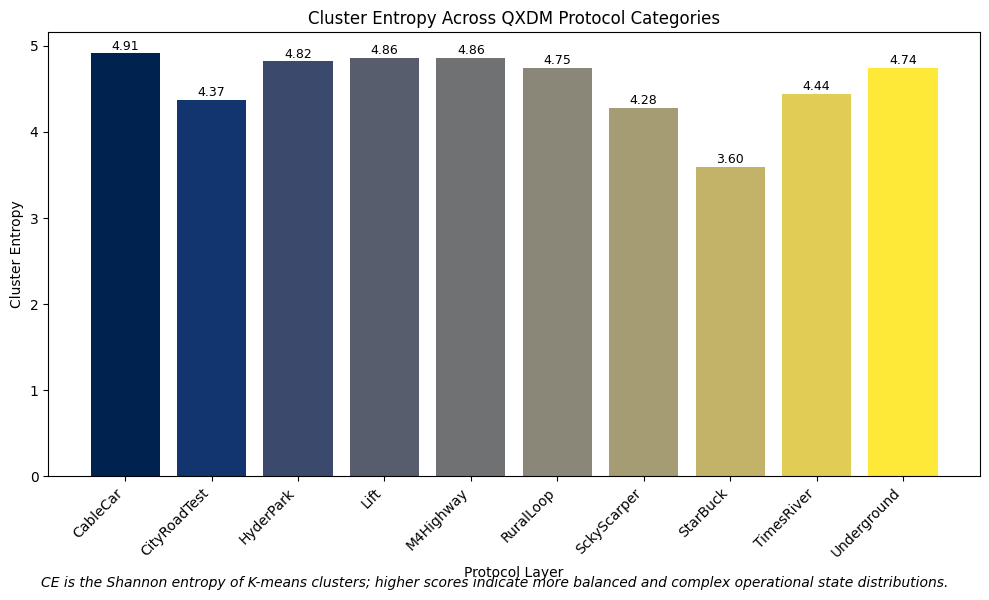

Cluster Entropy Statistics:
Mean: 4.563
Std:  0.408
Range: 3.599 - 4.911


In [4]:
# Add title cell for Cluster Entropy
print("### 3.3 Cluster Entropy (CE) - Protocol State Distribution")

# Cluster Entropy (CE)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(release_df['protocol'], release_df['cluster_entropy'], 
              color=plt.cm.cividis(np.linspace(0, 1, len(release_df))))
ax.set_xlabel('Protocol Layer')
ax.set_ylabel('Cluster Entropy')
ax.set_title('Cluster Entropy Across QXDM Protocol Categories')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, release_df['cluster_entropy']):
    height = bar.get_height()
    if height > 0:  # Only show labels for non-zero values
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.2f}', ha='center', va='bottom', fontsize=9)

fig.text(
    0.5, 0.02,
    'CE is the Shannon entropy of K-means clusters; higher scores indicate more balanced and complex operational state distributions.',
    ha='center', va='center', fontsize=10, style='italic'
)
plt.tight_layout()
plt.show()

print(f"Cluster Entropy Statistics:")
print(f"Mean: {release_df['cluster_entropy'].mean():.3f}")
print(f"Std:  {release_df['cluster_entropy'].std():.3f}")
print(f"Range: {release_df['cluster_entropy'].min():.3f} - {release_df['cluster_entropy'].max():.3f}")

### 3.4 Change Magnitude (CM) - Inter-Protocol Semantic Distance


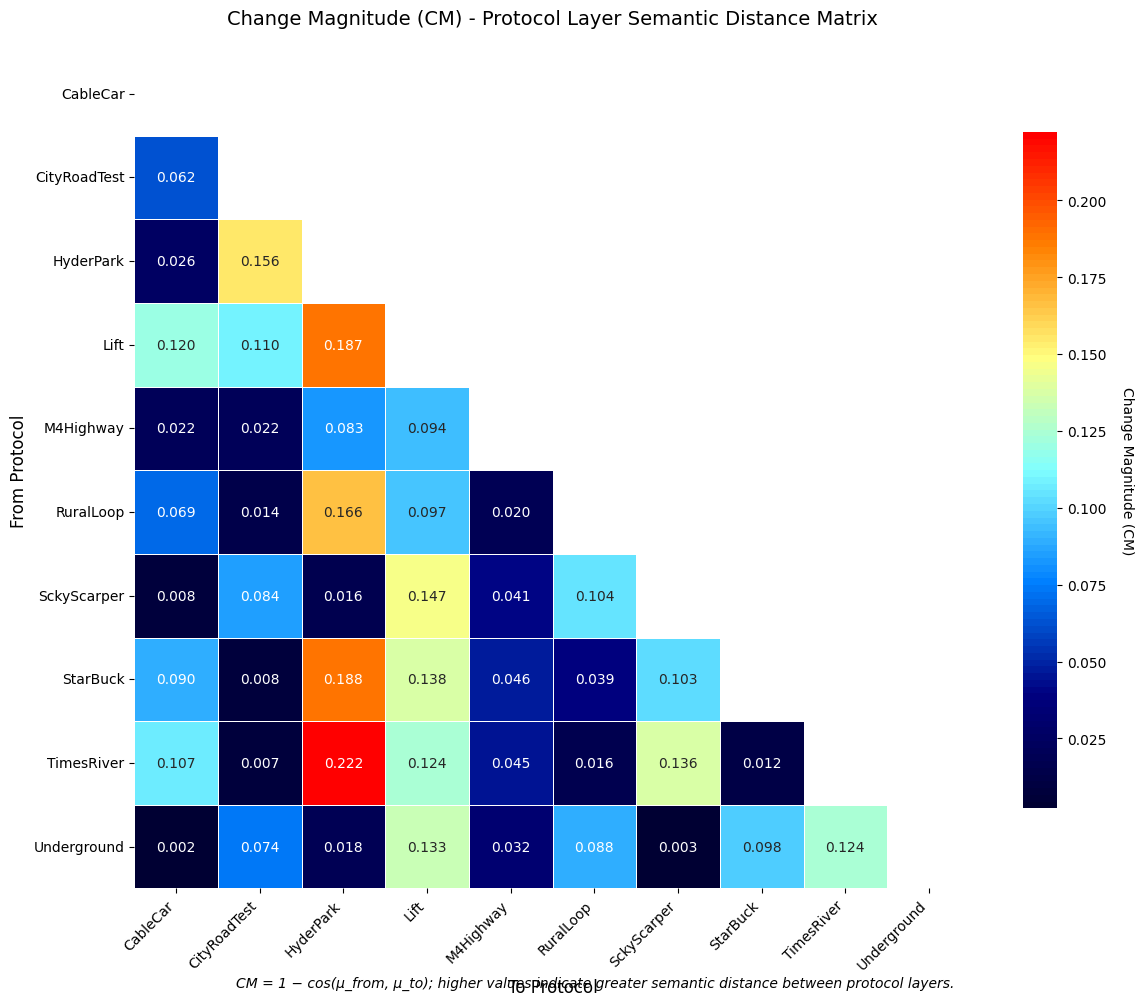


Change Magnitude Statistics:
Mean: 0.0778
Std:  0.0580
Range: 0.0022 - 0.2222

Most semantically distant: HyderPark → TimesRiver (CM = 0.2222)
Most semantically similar: CableCar → Underground (CM = 0.0022)


In [5]:
# === 3.4 Change Magnitude (CM) - Heatmap Visualization ===
print("### 3.4 Change Magnitude (CM) - Inter-Protocol Semantic Distance")

# Create a pivot table for heatmap visualization
cm_pivot = delta_df.pivot(index='from', columns='to', values='change_magnitude')

# Create the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(cm_pivot, dtype=bool))  # Mask upper triangle since matrix is symmetric

# Create custom colormap
colors = ['#000033', '#000080', '#0080FF', '#80FFFF', '#FFFF80', '#FF8000', '#FF0000']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

sns.heatmap(cm_pivot, mask=mask, annot=True, fmt='.3f', cmap=cmap, 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Change Magnitude (CM) - Protocol Layer Semantic Distance Matrix', fontsize=14, pad=20)
plt.xlabel('To Protocol', fontsize=12)
plt.ylabel('From Protocol', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Change Magnitude (CM)', rotation=270, labelpad=20)

plt.figtext(0.5, 0.02, 
           'CM = 1 − cos(μ_from, μ_to); higher values indicate greater semantic distance between protocol layers.',
           ha='center', va='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

# Statistics
print(f"\nChange Magnitude Statistics:")
print(f"Mean: {delta_df['change_magnitude'].mean():.4f}")
print(f"Std:  {delta_df['change_magnitude'].std():.4f}")
print(f"Range: {delta_df['change_magnitude'].min():.4f} - {delta_df['change_magnitude'].max():.4f}")

# Find most and least similar protocol pairs
max_cm = delta_df.loc[delta_df['change_magnitude'].idxmax()]
min_cm = delta_df.loc[delta_df['change_magnitude'].idxmin()]
print(f"\nMost semantically distant: {max_cm['from']} → {max_cm['to']} (CM = {max_cm['change_magnitude']:.4f})")
print(f"Most semantically similar: {min_cm['from']} → {min_cm['to']} (CM = {min_cm['change_magnitude']:.4f})")

### 3.5 Novelty Density (ND) - Inter-Layer Operational Uniqueness

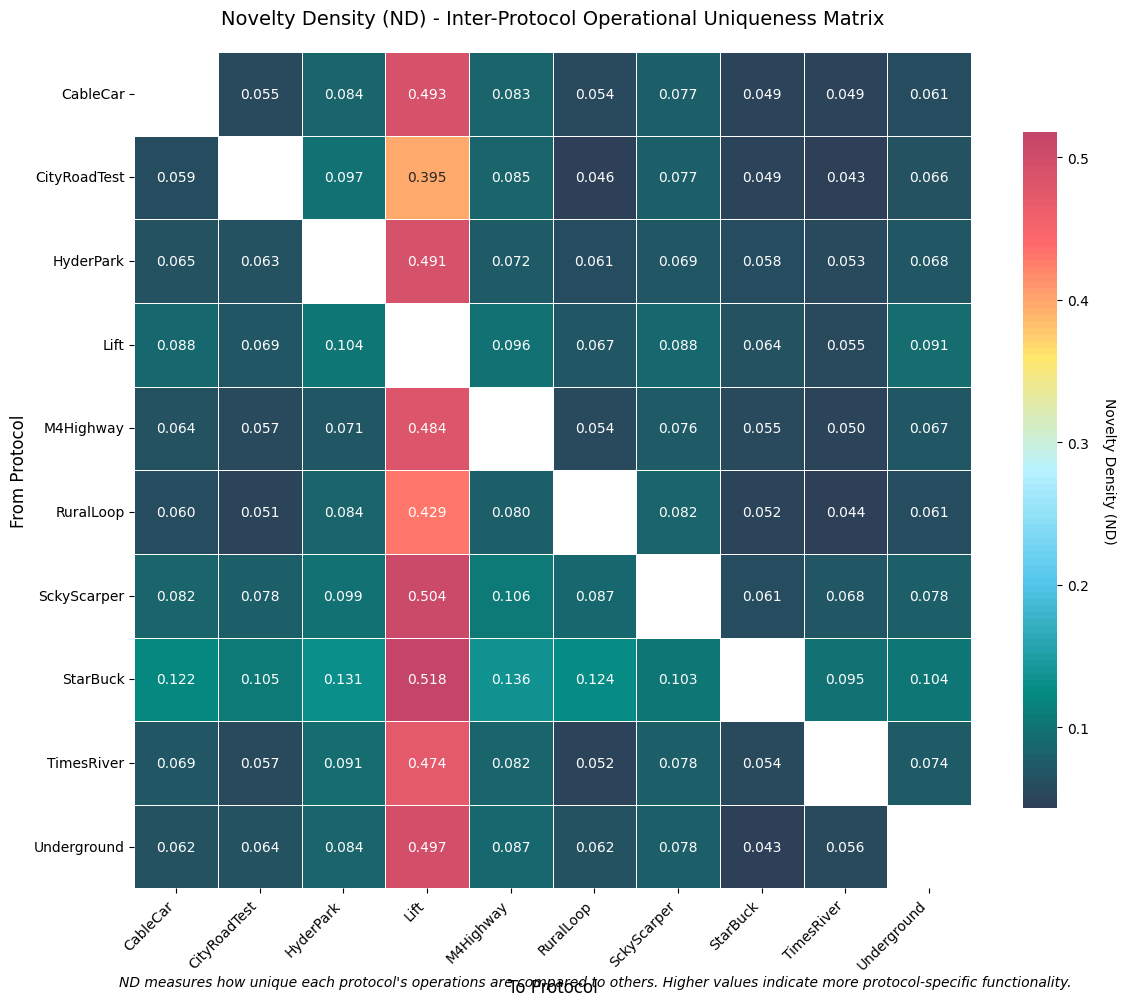


Novelty Density Statistics:
Mean: 0.1137
Std:  0.1236
Range: 0.0430 - 0.5178

Most novel relationship: StarBuck → Lift (ND = 0.5178)
Least novel relationship: CityRoadTest → TimesRiver (ND = 0.0430)

Protocol Novelty Ranking (average ND to other protocols):
  StarBuck: 0.1598
  SckyScarper: 0.1292
  Underground: 0.1149
  TimesRiver: 0.1145
  CableCar: 0.1119
  HyderPark: 0.1111
  M4Highway: 0.1086
  RuralLoop: 0.1046
  CityRoadTest: 0.1021
  Lift: 0.0802


In [6]:
# === Novelty Density (ND) - Heatmap Visualization ===

# Create a pivot table for heatmap visualization
nd_pivot = delta_df.pivot(index='from', columns='to', values='novelty_density')

# Create the heatmap
plt.figure(figsize=(12, 10))

# Create custom colormap for novelty (cool to warm)
colors = ['#2E4057', '#048A81', '#54C6EB', '#B8F2FF', '#FFE66D', '#FF6B6B', '#C44569']
n_bins = 100
cmap_nd = LinearSegmentedColormap.from_list('novelty', colors, N=n_bins)

sns.heatmap(nd_pivot, annot=True, fmt='.3f', cmap=cmap_nd, 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Novelty Density (ND) - Inter-Protocol Operational Uniqueness Matrix', fontsize=14, pad=20)
plt.xlabel('To Protocol', fontsize=12)
plt.ylabel('From Protocol', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Novelty Density (ND)', rotation=270, labelpad=20)

plt.figtext(0.5, 0.02, 
           'ND measures how unique each protocol\'s operations are compared to others. Higher values indicate more protocol-specific functionality.',
           ha='center', va='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

# Statistics and insights
print(f"\nNovelty Density Statistics:")
print(f"Mean: {delta_df['novelty_density'].mean():.4f}")
print(f"Std:  {delta_df['novelty_density'].std():.4f}")
print(f"Range: {delta_df['novelty_density'].min():.4f} - {delta_df['novelty_density'].max():.4f}")

# Find most and least novel protocol relationships
max_nd = delta_df.loc[delta_df['novelty_density'].idxmax()]
min_nd = delta_df.loc[delta_df['novelty_density'].idxmin()]
print(f"\nMost novel relationship: {max_nd['from']} → {max_nd['to']} (ND = {max_nd['novelty_density']:.4f})")
print(f"Least novel relationship: {min_nd['from']} → {min_nd['to']} (ND = {min_nd['novelty_density']:.4f})")

# Protocol novelty ranking
protocol_novelty = delta_df.groupby('from')['novelty_density'].mean().sort_values(ascending=False)
print(f"\nProtocol Novelty Ranking (average ND to other protocols):")
for protocol, avg_nd in protocol_novelty.items():
    print(f"  {protocol}: {avg_nd:.4f}")

## 4. Protocol Complexity Index (PCI) for QXDM Analysis

$$
\boxed{\; \mathrm{PCI}_p \;=\; S_p \;\times\; D_p \;\times\; U_p \;}
$$

**Protocol Complexity Index (PCI)** aggregates three key dimensions of cellular protocol implementation complexity:

* **Size** \((S_p)\) – *Volume*: How many operations need to be implemented  
* **Diversity** \((D_p)\) – *Variety*: How different the protocol operations are  
* **Uniqueness** \((U_p)\) – *Specificity*: How protocol-specific the functionality is

### 4.1 Component Definitions for QXDM Protocols

| Symbol | Formula | Captures | Interpretation |
|--------|---------|----------|----------------|
| $S_p$ | $\log_{10} N_p$ | **Size** – logarithmic sentence count | Implementation volume |
| $D_p$ | $\displaystyle \frac{\mathrm{CE}_p \,\times\, \mathrm{SS}_p}{\max(0.1, \mathrm{RI}_p)}$ | **Diversity** – operational complexity | State machine complexity |
| $U_p$ | $\displaystyle 1 + \overline{\mathrm{ND}}_p$ | **Uniqueness** – average novelty to other protocols | Protocol specialization |

Where:
- $N_p$ = number of log sentences for protocol $p$
- $\mathrm{CE}_p$ = cluster entropy (operational state balance)
- $\mathrm{SS}_p$ = semantic spread (operational breadth)  
- $\mathrm{RI}_p$ = redundancy index (message diversity)
- $\overline{\mathrm{ND}}_p$ = average novelty density to all other protocols

### 4.2 QXDM Protocol Insights

**Protocol Complexity Factors**:
- **RRC Layer**: High complexity due to diverse connection management and mobility procedures
- **MAC Layer**: Medium complexity with scheduling and hybrid ARQ operations  
- **PHY Layer**: Specialized complexity with signal processing and channel operations

**Engineering Implications**:
- Higher PCI indicates more challenging implementation and testing requirements
- Protocols with high uniqueness (U) may require specialized expertise
- Diversity (D) reflects state machine complexity and corner case handling

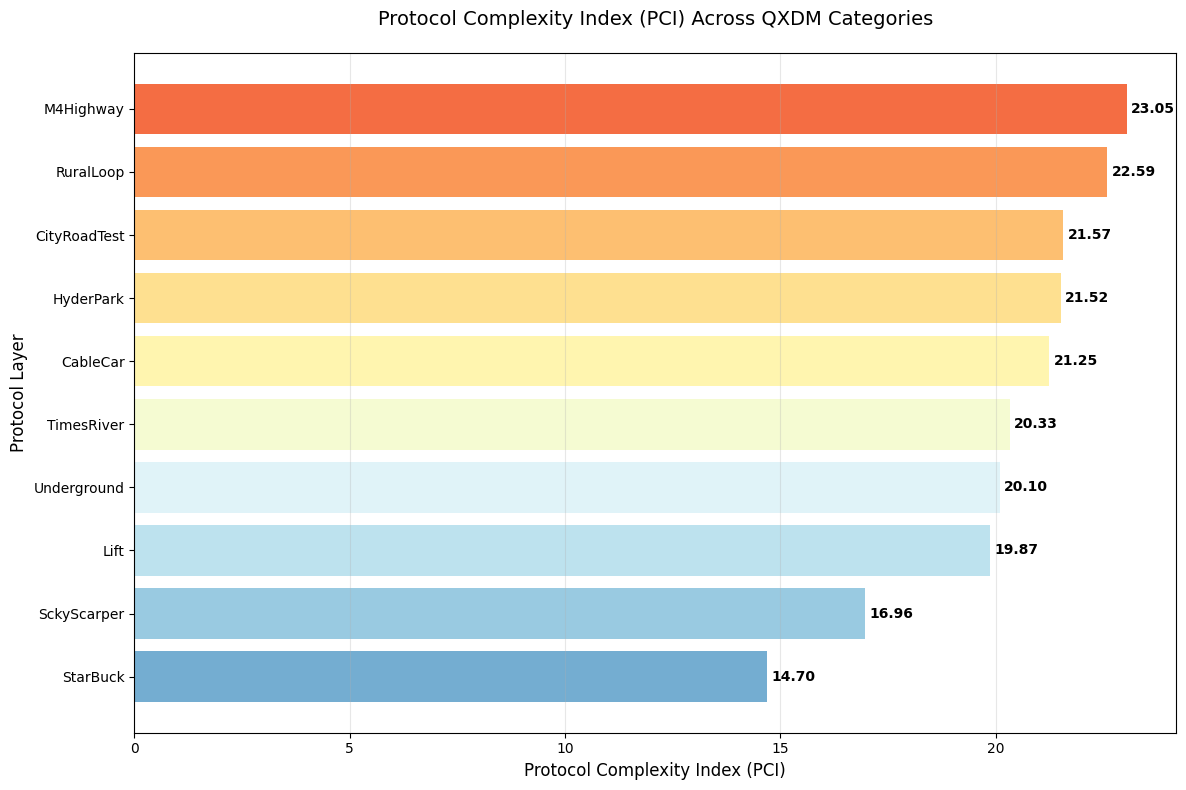

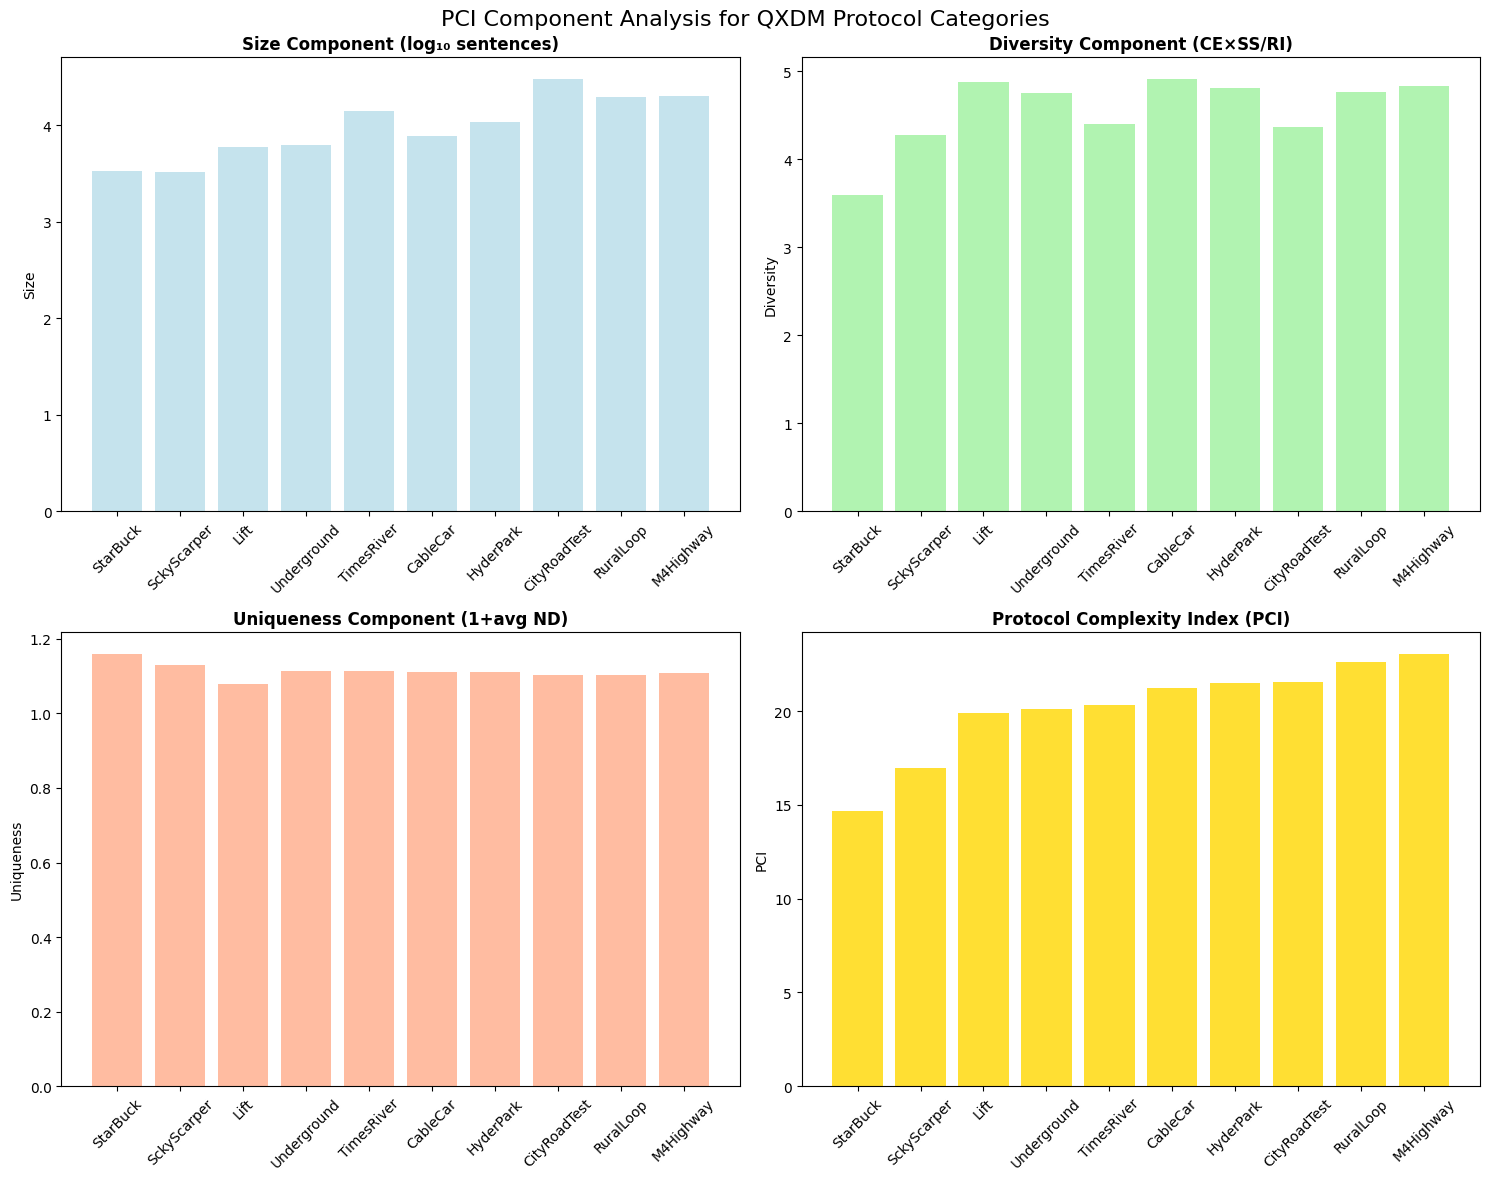

=== Protocol Complexity Index Results ===

PCI Rankings (highest to lowest complexity):
M4Highway: 23.048
  └─ Size: 4.30, Diversity: 4.83, Uniqueness: 1.11
RuralLoop: 22.593
  └─ Size: 4.30, Diversity: 4.76, Uniqueness: 1.10
CityRoadTest: 21.572
  └─ Size: 4.48, Diversity: 4.37, Uniqueness: 1.10
HyderPark: 21.521
  └─ Size: 4.03, Diversity: 4.81, Uniqueness: 1.11
CableCar: 21.247
  └─ Size: 3.89, Diversity: 4.91, Uniqueness: 1.11
TimesRiver: 20.333
  └─ Size: 4.14, Diversity: 4.40, Uniqueness: 1.11
Underground: 20.100
  └─ Size: 3.80, Diversity: 4.75, Uniqueness: 1.11
Lift: 19.873
  └─ Size: 3.77, Diversity: 4.88, Uniqueness: 1.08
SckyScarper: 16.962
  └─ Size: 3.51, Diversity: 4.28, Uniqueness: 1.13
StarBuck: 14.697
  └─ Size: 3.52, Diversity: 3.60, Uniqueness: 1.16

PCI Statistics:
Mean PCI: 20.195
Std PCI:  2.571
Range:    14.697 - 23.048

=== Component Correlations ===
             size  diversity  uniqueness    PCI
size        1.000      0.396      -0.521  0.841
diversity   0.396

In [7]:
# === Computing Protocol Complexity Index (PCI) ===

# Calculate component metrics
release_df['size'] = np.log10(release_df['sentences'])

# Diversity: CE × SS / max(0.1, RI) to avoid division by zero
release_df['diversity'] = (release_df['cluster_entropy'] * release_df['semantic_spread']) / np.maximum(0.1, release_df['redundancy_index'])

# Uniqueness: 1 + average novelty density to other protocols
protocol_uniqueness = {}
for protocol in release_df['protocol']:
    # Get average novelty density from this protocol to all others
    outgoing_nd = delta_df[delta_df['from'] == protocol]['novelty_density'].mean()
    protocol_uniqueness[protocol] = 1 + outgoing_nd

release_df['uniqueness'] = release_df['protocol'].map(protocol_uniqueness)

# Protocol Complexity Index: Size × Diversity × Uniqueness
release_df['PCI'] = release_df['size'] * release_df['diversity'] * release_df['uniqueness']

# Sort by PCI for better visualization
release_df_sorted = release_df.sort_values('PCI', ascending=True)

# === Visualization 1: PCI Comparison ===
plt.figure(figsize=(12, 8))
bars = plt.barh(release_df_sorted['protocol'], release_df_sorted['PCI'], 
                color=plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(release_df_sorted))))

plt.xlabel('Protocol Complexity Index (PCI)', fontsize=12)
plt.ylabel('Protocol Layer', fontsize=12)
plt.title('Protocol Complexity Index (PCI) Across QXDM Categories', fontsize=14, pad=20)

# Add value labels
for bar, value in zip(bars, release_df_sorted['PCI']):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2., 
             f'{value:.2f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# === Visualization 2: Component Breakdown ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
protocols = release_df_sorted['protocol']

# Size component
ax1.bar(protocols, release_df_sorted['size'], color='lightblue', alpha=0.7)
ax1.set_title('Size Component (log₁₀ sentences)', fontweight='bold')
ax1.set_ylabel('Size')
ax1.tick_params(axis='x', rotation=45)

# Diversity component  
ax2.bar(protocols, release_df_sorted['diversity'], color='lightgreen', alpha=0.7)
ax2.set_title('Diversity Component (CE×SS/RI)', fontweight='bold')
ax2.set_ylabel('Diversity')
ax2.tick_params(axis='x', rotation=45)

# Uniqueness component
ax3.bar(protocols, release_df_sorted['uniqueness'], color='lightsalmon', alpha=0.7)
ax3.set_title('Uniqueness Component (1+avg ND)', fontweight='bold')  
ax3.set_ylabel('Uniqueness')
ax3.tick_params(axis='x', rotation=45)

# Final PCI
ax4.bar(protocols, release_df_sorted['PCI'], color='gold', alpha=0.8)
ax4.set_title('Protocol Complexity Index (PCI)', fontweight='bold')
ax4.set_ylabel('PCI')
ax4.tick_params(axis='x', rotation=45)

plt.suptitle('PCI Component Analysis for QXDM Protocol Categories', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# === Statistics and Insights ===
print("=== Protocol Complexity Index Results ===")
print(f"\nPCI Rankings (highest to lowest complexity):")
for i, row in release_df.sort_values('PCI', ascending=False).iterrows():
    print(f"{row['protocol']}: {row['PCI']:.3f}")
    print(f"  └─ Size: {row['size']:.2f}, Diversity: {row['diversity']:.2f}, Uniqueness: {row['uniqueness']:.2f}")

print(f"\nPCI Statistics:")
print(f"Mean PCI: {release_df['PCI'].mean():.3f}")
print(f"Std PCI:  {release_df['PCI'].std():.3f}")
print(f"Range:    {release_df['PCI'].min():.3f} - {release_df['PCI'].max():.3f}")

# Component correlation analysis
print(f"\n=== Component Correlations ===")
corr_matrix = release_df[['size', 'diversity', 'uniqueness', 'PCI']].corr()
print(corr_matrix.round(3))

### 4.3 Why This Multiplicative Form for Cellular Protocols?

* **Size × Diversity** captures the explosion of operational states and message combinations that must be implemented and tested in cellular protocols.  
* **Uniqueness** factor amplifies complexity for protocols with specialized, non-transferable functionality.
* **Logarithmic size scaling** keeps the three factors on comparable scales and prevents sentence count from dominating.

### 4.4 QXDM Engineering Insights

**Key Findings**:
1. **Protocol Specialization**: Higher uniqueness scores indicate protocols requiring specialized engineering expertise
2. **Implementation Complexity**: PCI directly correlates with:
   - State machine complexity (diversity component)
   - Testing surface area (size × diversity)
   - Cross-layer integration challenges (uniqueness)

**Practical Applications**:
- **Resource Planning**: Higher PCI protocols require more experienced developers
- **Testing Strategy**: Protocols with high diversity need more comprehensive test coverage  
- **Documentation Priority**: Unique protocols benefit from detailed implementation guides
- **Code Review Focus**: Complex protocols (high PCI) need more thorough review processes

**Cellular Protocol Hierarchy**:
The PCI reveals the natural complexity hierarchy in cellular systems, helping teams allocate engineering resources effectively across the protocol stack.

## 5. Protocol Relationship Network Visualization


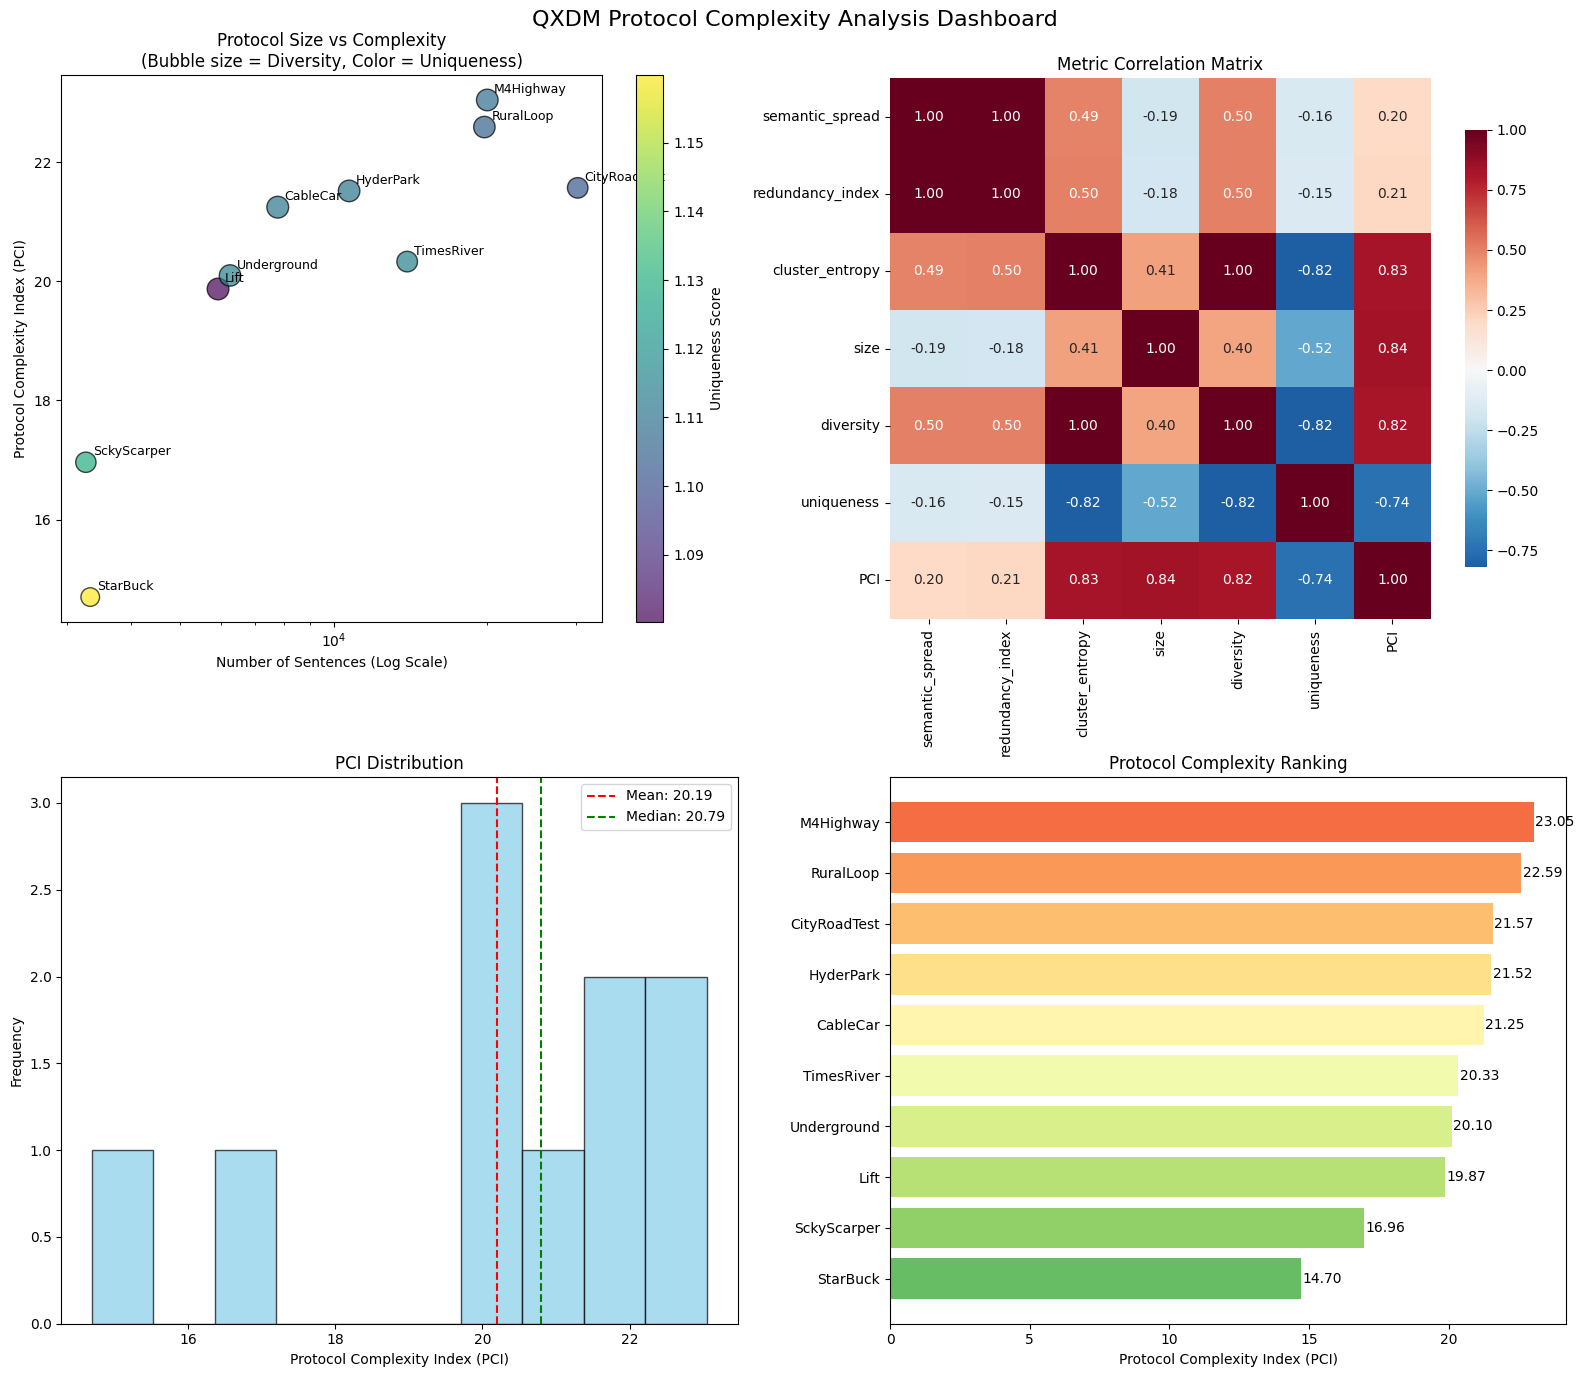


QXDM PROTOCOL COMPLEXITY ANALYSIS SUMMARY
📊 Dataset Overview:
   • Total protocols analyzed: 10
   • Total sentences processed: 121,222
   • Average sentences per protocol: 12122

🏆 Complexity Leaders:
   • Most complex: M4Highway (PCI = 23.048)
   • Least complex: StarBuck (PCI = 14.697)
   • Complexity ratio: 1.6x

📈 Key Insights:
   • Most diverse operations: CableCar (Diversity = 4.91)
   • Most unique functionality: StarBuck (Uniqueness = 1.16)
   • Largest protocol: CityRoadTest (30174 sentences)

🔬 Technical Recommendations:
   • Focus engineering resources on: CableCar, CityRoadTest, HyderPark, M4Highway, RuralLoop, TimesRiver
   • These protocols require specialized expertise and comprehensive testing


In [8]:
# === 5. Protocol Relationship Network Analysis ===
print("## 5. Protocol Relationship Network Visualization")

# Create a comprehensive protocol relationship visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

# 1. Protocol Size vs Complexity Scatter
scatter = ax1.scatter(release_df['sentences'], release_df['PCI'], 
                     s=release_df['diversity']*50, 
                     c=release_df['uniqueness'], 
                     cmap='viridis', alpha=0.7, edgecolors='black', linewidth=1)
ax1.set_xlabel('Number of Sentences (Log Scale)')
ax1.set_ylabel('Protocol Complexity Index (PCI)')
ax1.set_title('Protocol Size vs Complexity\n(Bubble size = Diversity, Color = Uniqueness)')
ax1.set_xscale('log')

# Add protocol labels
for _, row in release_df.iterrows():
    ax1.annotate(row['protocol'], (row['sentences'], row['PCI']), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.colorbar(scatter, ax=ax1, label='Uniqueness Score')

# 2. Metric Correlation Heatmap
metrics = ['semantic_spread', 'redundancy_index', 'cluster_entropy', 'size', 'diversity', 'uniqueness', 'PCI']
corr_matrix = release_df[metrics].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            square=True, ax=ax2, cbar_kws={"shrink": .8})
ax2.set_title('Metric Correlation Matrix')

# 3. Protocol Complexity Distribution
ax3.hist(release_df['PCI'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(release_df['PCI'].mean(), color='red', linestyle='--', 
           label=f'Mean: {release_df["PCI"].mean():.2f}')
ax3.axvline(release_df['PCI'].median(), color='green', linestyle='--', 
           label=f'Median: {release_df["PCI"].median():.2f}')
ax3.set_xlabel('Protocol Complexity Index (PCI)')
ax3.set_ylabel('Frequency')
ax3.set_title('PCI Distribution')
ax3.legend()

# 4. Protocol Ranking Bar Chart
sorted_protocols = release_df.sort_values('PCI', ascending=True)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(sorted_protocols)))
bars = ax4.barh(range(len(sorted_protocols)), sorted_protocols['PCI'], color=colors)
ax4.set_yticks(range(len(sorted_protocols)))
ax4.set_yticklabels(sorted_protocols['protocol'])
ax4.set_xlabel('Protocol Complexity Index (PCI)')
ax4.set_title('Protocol Complexity Ranking')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, sorted_protocols['PCI'])):
    ax4.text(value + 0.05, bar.get_y() + bar.get_height()/2., 
             f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.suptitle('QXDM Protocol Complexity Analysis Dashboard', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# === Summary Report ===
print("\n" + "="*60)
print("QXDM PROTOCOL COMPLEXITY ANALYSIS SUMMARY")
print("="*60)

total_sentences = release_df['sentences'].sum()
avg_pci = release_df['PCI'].mean()
max_protocol = release_df.loc[release_df['PCI'].idxmax()]
min_protocol = release_df.loc[release_df['PCI'].idxmin()]

print(f"📊 Dataset Overview:")
print(f"   • Total protocols analyzed: {len(release_df)}")
print(f"   • Total sentences processed: {total_sentences:,}")
print(f"   • Average sentences per protocol: {total_sentences/len(release_df):.0f}")

print(f"\n🏆 Complexity Leaders:")
print(f"   • Most complex: {max_protocol['protocol']} (PCI = {max_protocol['PCI']:.3f})")
print(f"   • Least complex: {min_protocol['protocol']} (PCI = {min_protocol['PCI']:.3f})")
print(f"   • Complexity ratio: {max_protocol['PCI']/min_protocol['PCI']:.1f}x")

print(f"\n📈 Key Insights:")
most_diverse = release_df.loc[release_df['diversity'].idxmax()]
most_unique = release_df.loc[release_df['uniqueness'].idxmax()]
largest = release_df.loc[release_df['sentences'].idxmax()]

print(f"   • Most diverse operations: {most_diverse['protocol']} (Diversity = {most_diverse['diversity']:.2f})")
print(f"   • Most unique functionality: {most_unique['protocol']} (Uniqueness = {most_unique['uniqueness']:.2f})")
print(f"   • Largest protocol: {largest['protocol']} ({largest['sentences']} sentences)")

print(f"\n🔬 Technical Recommendations:")
high_complexity = release_df[release_df['PCI'] > avg_pci]['protocol'].tolist()
if high_complexity:
    print(f"   • Focus engineering resources on: {', '.join(high_complexity)}")
    print(f"   • These protocols require specialized expertise and comprehensive testing")

print("="*60)